In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
import numpy as np
from scipy import stats 
import statsmodels.api as sm
import random

In [2]:
df = pd.read_csv('data.csv', sep=',', header=0, index_col=None)
pd.set_option('display.max_rows', 5000) #*****Update*****
df

,personid,anchor,var3,judgement,random,questionid,trueanswer
0,1,51,H,48,-3,1,30.5
1,2,51,H,48,-3,1,30.5
2,3,10,L,-28,-38,1,30.5
3,4,10,L,0,-10,1,30.5
4,1,27,L,3,-24,2,65.0
5,2,27,L,34,7,2,65.0
6,3,103,H,125,22,2,65.0
7,4,103,H,151,48,2,65.0
8,1,592,H,621,29,3,421.5
9,2,592,H,597,5,3,421.5


In [3]:
#Bootstrapping

n = 500
sampleH = df[df['var3']=='H']
sampleL = df[df['var3']=='L']

def sampling(sample, n):
    newSample = np.random.choice(sample.personid, n, replace = True)
    data = sample.copy()

    for i in range(n):
        replication = sample[sample['personid'] == newSample[i]].sample()
        data = data.append(replication)
        
    return data

#Concatenating new samples with the original data 
dataH = sampling(sampleH, n)
dataL = sampling(sampleL, n)
data = pd.concat([df, dataH, dataL])

# Reseting indexes of final data
data = data.reset_index(drop=True)

In [4]:
#*****Update*****
#Saving the new data generated after appyling bootstrapping to the original data
#Every time the function sampling is called, new random samples are replicated and added to the original data.

data.to_csv('bootstrapping_data.csv')

In [5]:
data.tail(5)

,personid,anchor,var3,judgement,random,questionid,trueanswer
1187,2,138,L,136,-2,22,184.5
1188,4,329,L,281,-48,23,464.5
1189,4,128,L,154,26,21,148.5
1190,4,359,L,345,-14,11,529.5
1191,1,138,L,142,4,22,184.5


In [6]:
# Deviation of judgement from trueanswer
data['deviation1'] = data['judgement'] - data['trueanswer']

# Deviation of anchor from trueanswer
data['deviation2'] = data['anchor'] - data['trueanswer']

# Binary anchor 
data['anchor_binary'] = np.where(data['var3']=='H', 1, 0)

# Binary Deviation of judgement from trueanswer
data['deviation_binary'] = np.where((data['judgement'] - data['trueanswer']) > 0, 1, 0)

data.head(5)

,personid,anchor,var3,judgement,random,questionid,trueanswer,deviation1,deviation2,anchor_binary,deviation_binary
0,1,51,H,48,-3,1,30.5,17.5,20.5,1,1
1,2,51,H,48,-3,1,30.5,17.5,20.5,1,1
2,3,10,L,-28,-38,1,30.5,-58.5,-20.5,0,0
3,4,10,L,0,-10,1,30.5,-30.5,-20.5,0,0
4,1,27,L,3,-24,2,65.0,-62.0,-38.0,0,0


In [7]:
#Descriptive statistics that summarize the central tendency and dispersion

data[['anchor', 'judgement', 'trueanswer', 'deviation1', 'deviation2']].describe().round(0).astype(int)

,anchor,judgement,trueanswer,deviation1,deviation2
count,1192,1192,1192,1192,1192
mean,187,186,187,-1,-1
std,177,182,159,89,82
min,10,-28,24,-218,-170
25%,67,65,78,-44,-21
50%,123,130,132,-10,0
75%,231,270,356,49,21
max,700,738,530,208,170


In [8]:
#Grouping the data by anchor (High/Low), ignoring personid, questionid, random

byanchor = data.groupby(['var3']).mean()
byanchor.drop(['personid','questionid','random'], axis=1, inplace=True)
byanchor.round(0).astype(int)

,anchor,judgement,trueanswer,deviation1,deviation2,anchor_binary,deviation_binary
var3,,,,,,,
H,244,245,186,59,58,1,1
L,130,127,188,-61,-59,0,0


In [9]:
print(plt.style.available)

['bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark-palette', 'seaborn-dark', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'seaborn', 'Solarize_Light2', 'tableau-colorblind10', '_classic_test']


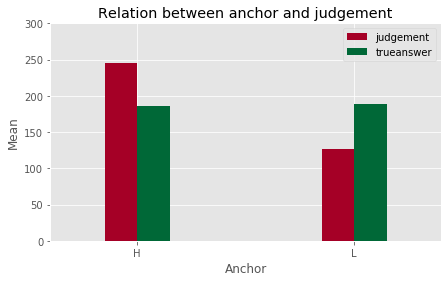

In [10]:
#Bar plot by anchor

style.use('ggplot')
judge_anchor = byanchor[['judgement','trueanswer']]
ax = judge_anchor.plot(subplots=False, figsize=(7, 4), kind='bar', width=0.3, colormap='RdYlGn', title ="Relation between anchor and judgement")
ax.set_xlabel("Anchor")
ax.set_ylabel("Mean")
plt.xticks(rotation=360)
plt.ylim([0,300]);

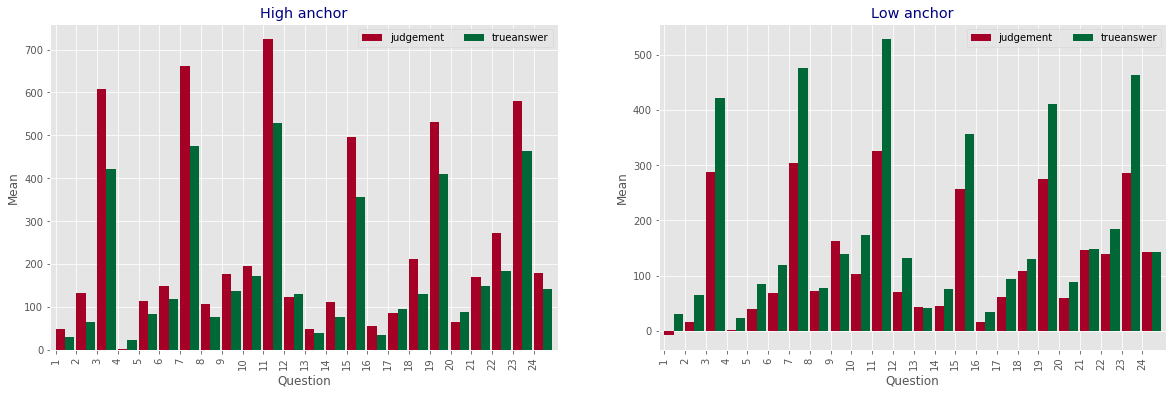

In [11]:
# Grouping by High/Low anchor

mask1 = data['var3'] == 'H'
mask2 = data['var3'] == 'L'

H = data[mask1][['judgement','trueanswer','questionid']]
L = data[mask2][['judgement','trueanswer','questionid']]

colors=['#A50026','#006837']

High = H.groupby(['questionid']).mean()
Low = L.groupby(['questionid']).mean()

# Bar plots for questions by anchor (High/Low)

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 6))
High.plot(ax=axes[0], kind='bar', width=0.9, color=colors,align='edge')
axes[0].set_title("High anchor", color='navy')
Low.plot(ax=axes[1], kind='bar', width=0.9, color=colors,align='edge')
axes[1].set_title("Low anchor", color='navy')

for ax in axes:
    ax.set_xlabel('Question')
    ax.set_ylabel('Mean')
    ax.legend(loc='best', ncol=2)
plt.show();

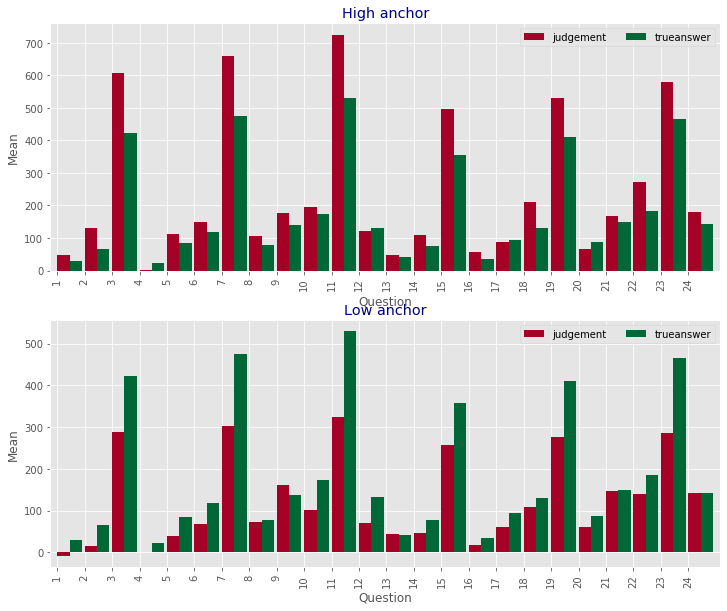

In [12]:
#Same plots but bigger

colors=['#A50026','#006837']
fig, axes = plt.subplots(nrows=2, ncols=1)
High.plot(ax=axes[0],kind='bar',width=0.9,color=colors,align='edge',figsize=(12, 10))
axes[0].set_title("High anchor", color='navy')
Low.plot(ax=axes[1],kind='bar', width=0.9,color=colors,align='edge',figsize=(12, 10))
axes[1].set_title("Low anchor", color='navy')

for ax in axes:
    ax.set_xlabel('Question')
    ax.set_ylabel('Mean')
    ax.legend(loc='best', ncol=2)
plt.show();

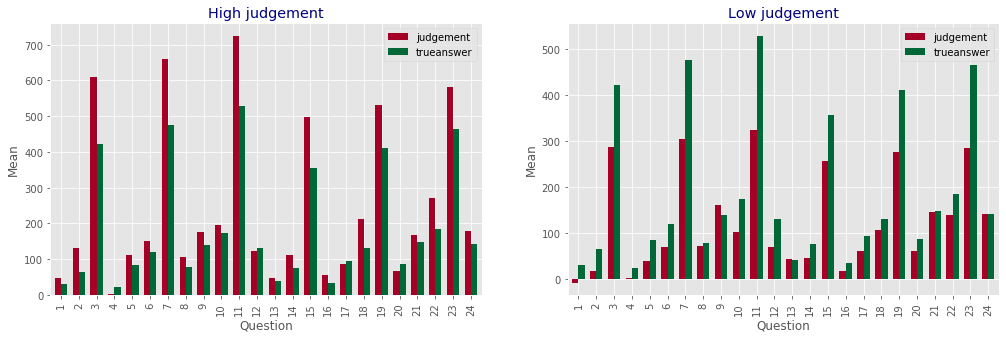

In [13]:
# Grouping questions by High/Low judgement

judgeH = data[mask1][['judgement','trueanswer','questionid']]
judgeL = data[mask2][['judgement','trueanswer','questionid']]

judge_H = judgeH.groupby(['questionid']).mean()
judge_L = judgeL.groupby(['questionid']).mean()

# Second version of bar plots by questions for High/Low judgement

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(17, 5))
judge_H.plot(ax=axes[0], kind='bar', width=0.7, colormap='RdYlGn')
axes[0].set_title("High judgement", color='navy')
judge_L.plot(ax=axes[1], kind='bar', width=0.7, colormap='RdYlGn')
axes[1].set_title("Low judgement", color='navy')

for ax in axes:
    ax.set_xlabel('Question')
    ax.set_ylabel('Mean')
    ax.legend(loc='upper right')
plt.show();

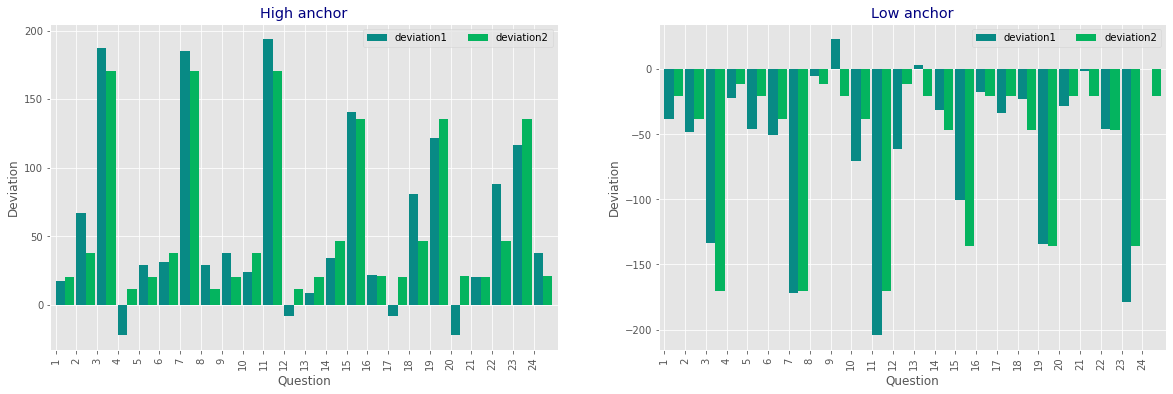

In [14]:
# Grouping by High/Low anchor

mask1 = data['var3'] == 'H'
mask2 = data['var3'] == 'L'

H = data[mask1][['deviation1','deviation2','questionid']]
L = data[mask2][['deviation1','deviation2','questionid']]

colors=['#088A85','#04B45F']

High = H.groupby(['questionid']).mean()
Low = L.groupby(['questionid']).mean()

# Bar plots of deviations by questions for High/Low anchor

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 6))
High.plot(ax=axes[0], kind='bar', width=0.9, color=colors,align='edge')
axes[0].set_title("High anchor", color='navy')
Low.plot(ax=axes[1], kind='bar', width=0.9, color=colors,align='edge')
axes[1].set_title("Low anchor", color='navy')

for ax in axes:
    ax.set_xlabel('Question')
    ax.set_ylabel('Deviation')
    ax.legend(loc='best', ncol=2)
plt.show();

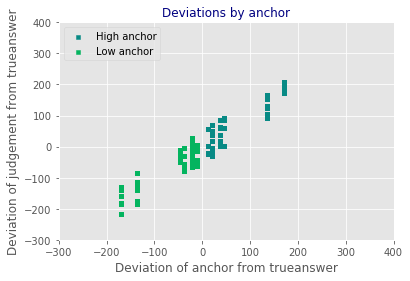

In [15]:
# Scatter plot between deviations by anchors

H = data[data['var3'] == 'H'][['deviation1','deviation2']]
L = data[data['var3'] == 'L'][['deviation1','deviation2']]

plt.scatter(H['deviation2'], H['deviation1'], facecolor='#088A85', s=20, label="High anchor",marker="s")
plt.scatter(L['deviation2'], L['deviation1'], facecolor='#04B45F', s=20, label="Low anchor",  marker="s")
plt.legend(loc='upper left');
plt.ylabel('Deviation of judgement from trueanswer')
plt.xlabel('Deviation of anchor from trueanswer')
plt.title('Deviations by anchor', fontsize=12, color='navy')
plt.xlim([-300,400])
plt.ylim([-300,400]);

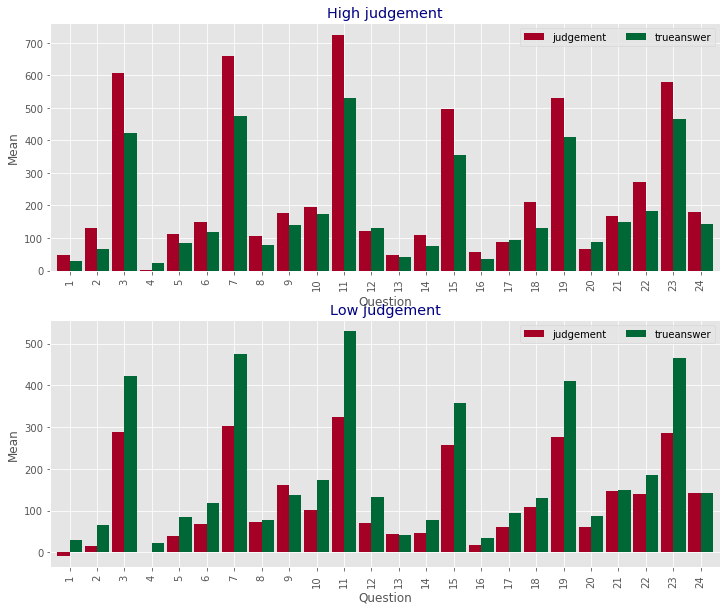

In [16]:
#Same plots but bigger

fig, axes = plt.subplots(nrows=2, ncols=1)
judge_H.plot(ax=axes[0],kind='bar',width=0.9,colormap='RdYlGn',align='center',figsize=(12, 10))
axes[0].set_title("High judgement", color='navy')
judge_L.plot(ax=axes[1],kind='bar', width=0.9,colormap='RdYlGn',align='center',figsize=(12, 10))
axes[1].set_title("Low judgement", color='navy')

for ax in axes:
    ax.set_xlabel('Question')
    ax.set_ylabel('Mean')
    ax.legend(loc='upper right', ncol=2)
plt.show();

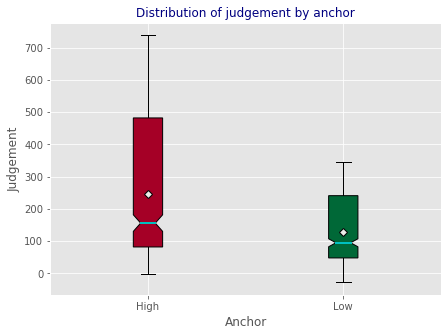

In [17]:
#Box plot by anchor

judgeH = data[mask1]['judgement']
judgeL = data[mask2]['judgement']
data2 = [judgeH, judgeL]

colors=['#A50026','#006837']
labels = ['High', 'Low']

median = dict(linestyle='-', linewidth=2, color='c')
meanp = dict(marker='D', markeredgecolor='black', markerfacecolor='#EDECE9')
plt.subplots(figsize=(7,5))

box = plt.boxplot(data2, labels=labels, notch=True, patch_artist=True, medianprops=median, showmeans=True, meanprops=meanp)

for patch, color in zip(box['boxes'], colors):
     patch.set_facecolor(color)

plt.title('Distribution of judgement by anchor', fontsize=12, color='navy')
plt.xlabel('Anchor')
plt.ylabel('Judgement');

In [18]:
# How well the anchor explained the deviation of judgement from trueanswer?
#*****Update*****: It seems sklearn.cross_validation is not available anymore.

from sklearn.cross_validation import train_test_split
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression


X, y = np.array(data['deviation1']).reshape(len(data['deviation1']), -1), np.array(data['anchor_binary'])

# Splitting the data before trainning
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)


model = LogisticRegression(C=1e5).fit(X_train, y_train)
pred = model.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.0f}%'.format(model.score(X_test, y_test) * 100))

ModuleNotFoundError: No module named 'sklearn.cross_validation'

In [ ]:
print(classification_report(y_test, pred))

In [ ]:
# Results on test set

plt.scatter(X_test, pred, facecolor='#088A85', s=20, marker="s")
plt.xlabel('Deviation of judgement from trueanswer')
plt.ylabel('Anchor')
plt.title('Logistic Regression Results', fontsize=12, color='navy');